# Sklearn Bike Sharing Notebook
Dieses Notebook dient as Lösungsvorschlag für die erste Aufgabenstellung.
Ziel ist es ein ML Modell (RandomForest, LinearRegression, DecisionTree oder K-NN) auf den auf moodle hochgeladenen bike-sharing datensatz anzuwenden.

In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapiq

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

shapiq.__version__

'1.2.3'

## Daten Einlesen

In [2]:
data = pd.read_csv('dataset/bike_sharing.csv')
data.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,2011,1,0,0,6,0,clear,9.84,14.395,0.81,0.0,16
1,spring,2011,1,1,0,6,0,clear,9.02,13.635,0.80,0.0,40
2,spring,2011,1,2,0,6,0,clear,9.02,13.635,0.80,0.0,32
3,spring,2011,1,3,0,6,0,clear,9.84,14.395,0.75,0.0,13
4,spring,2011,1,4,0,6,0,clear,9.84,14.395,0.75,0.0,1


In [3]:
# Eine kurze Übersicht über die Daten
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   year        17379 non-null  int64  
 2   month       17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  object 
 8   temp        17379 non-null  float64
 9   feel_temp   17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  count       17379 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 1.7+ MB


,year,month,hour,holiday,weekday,workingday,temp,feel_temp,humidity,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,20.376474,23.788755,0.627229,12.736540,189.463088
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,7.894801,8.592511,0.192930,8.196795,181.387599
min,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,13.940000,16.665000,0.480000,7.001500,40.000000
50%,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,0.630000,12.998000,142.000000
75%,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,27.060000,31.060000,0.780000,16.997900,281.000000
max,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,41.000000,50.000000,1.000000,56.996900,977.000000


Da einige ML Modell nicht mit kategorischen Daten umgehen können, kodieren wir diese als "One-Hot".
Hierbei erstellen wir für alle K Kategorien, einen Vector mit K 0/1 Einträgen.
Eine 1 in dem i-ten Eintrag entspricht, dass die i-te Kategorie bei dem Datenpunkt vorkam.

In [4]:
# Season one-hot encoding
data = pd.get_dummies(data, columns=['season'], drop_first=True)
# Weather one-hot encoding
data = pd.get_dummies(data, columns=['weather'], drop_first=True)

Wir können hier sehen wie für jede Kategorie von Season und Weather eine neue Spalte erzeugt wurde.

In [5]:
data.dtypes

year                    int64
month                   int64
hour                    int64
holiday                 int64
weekday                 int64
workingday              int64
temp                  float64
feel_temp             float64
humidity              float64
windspeed             float64
count                   int64
season_spring            bool
season_summer            bool
season_winter            bool
weather_heavy_rain       bool
weather_misty            bool
weather_rain             bool
dtype: object

## Aufspaltung auf Features und Targets
Typischerweise bezeichnet man die Features als X und das Target als y.

In [6]:
X = data.drop(['count'], axis=1).values
y = data['count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 16), (3476, 16), (13903,), (3476,))

## Modellerstellung

In [7]:
lineares_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)

In [8]:
lineares_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [9]:
y_pred_lineares = lineares_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [10]:
r2_lineares = r2_score(y_test, y_pred_lineares)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
r2_knn = r2_score(y_test, y_pred_knn)

mse_lineares = mean_squared_error(y_test, y_pred_lineares)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mes_knn = mean_squared_error(y_test, y_pred_knn)

Als nächstes werden die Metriken in einem Datensatz gesammelt und visuell dargestellt.

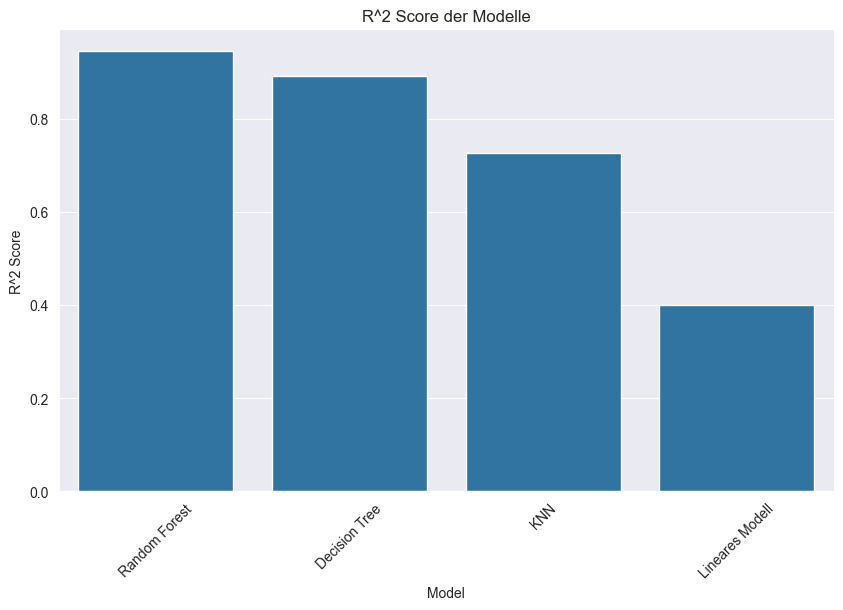

In [11]:
dataset_metriken = pd.DataFrame({
    'Model': ['Lineares Modell', 'Random Forest', 'Decision Tree', 'KNN'],
    'R^2': [r2_lineares, r2_random_forest, r2_decision_tree, r2_knn],
    'MSE': [mse_lineares, mse_random_forest, mse_decision_tree, mes_knn]
})
dataset_metriken = dataset_metriken.sort_values(by='R^2', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2', data=dataset_metriken)
plt.title('R^2 Score der Modelle')
plt.ylabel('R^2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()



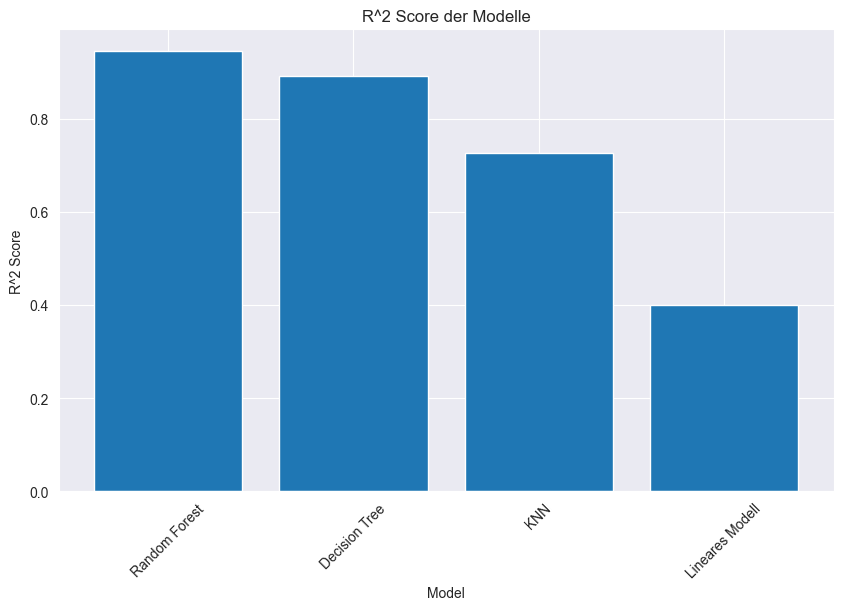

In [12]:
# alternativ nur mit matplotlib
plt.figure(figsize=(10, 6))
plt.bar(dataset_metriken['Model'], dataset_metriken['R^2'])
plt.title('R^2 Score der Modelle')
plt.ylabel('R^2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

Ein hoher R^2 Score signalisiert das unser Modell sehr gut die Daten erfasst.
Somit ist Random Forest und Decision Tree sehr gutes Modell für die Daten.

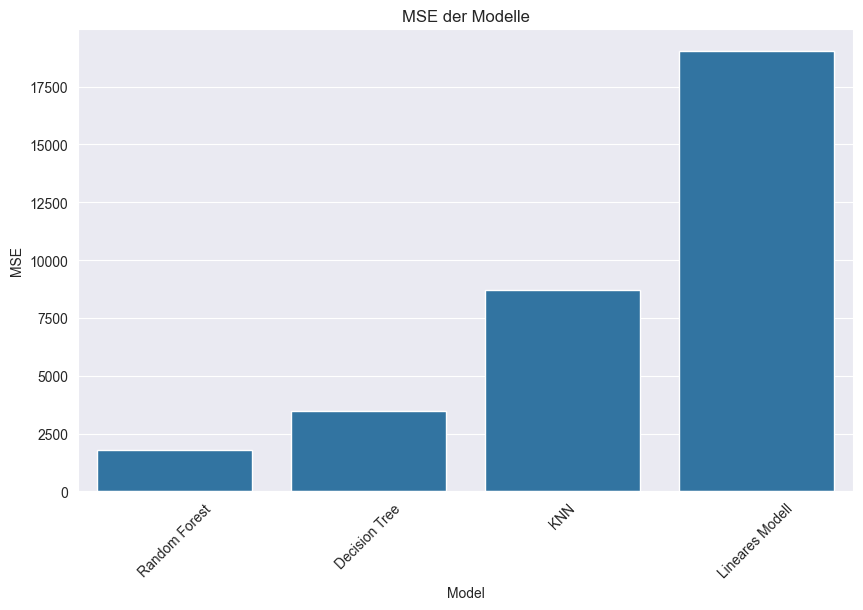

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MSE", data=dataset_metriken)
plt.title("MSE der Modelle")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


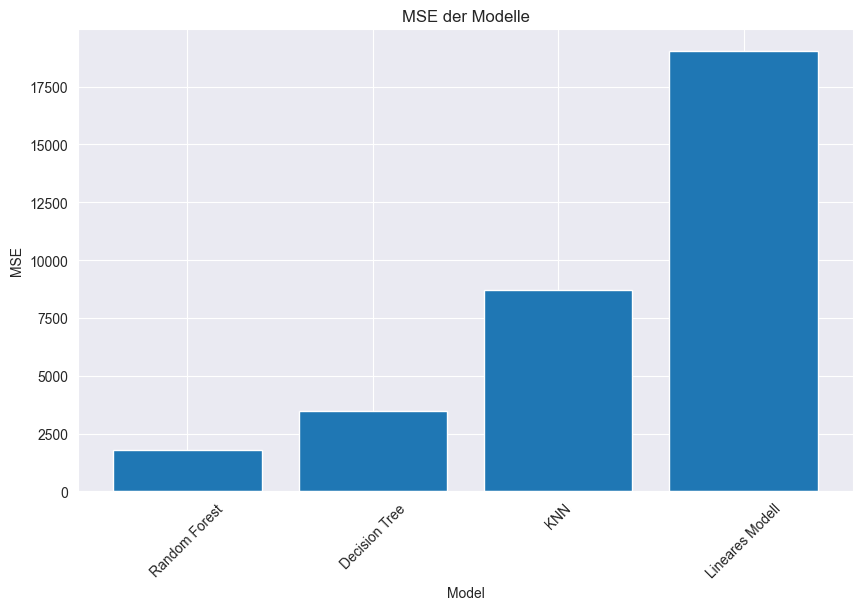

In [14]:
# alternativ nur mit matplotlib
plt.figure(figsize=(10, 6))
plt.bar(dataset_metriken["Model"], dataset_metriken["MSE"])
plt.title("MSE der Modelle")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

Hier ist wieder das selbe Bild.
Das Random Forest und Decision Tree scheinen einen sehr guten fit für die Daten zu haben.

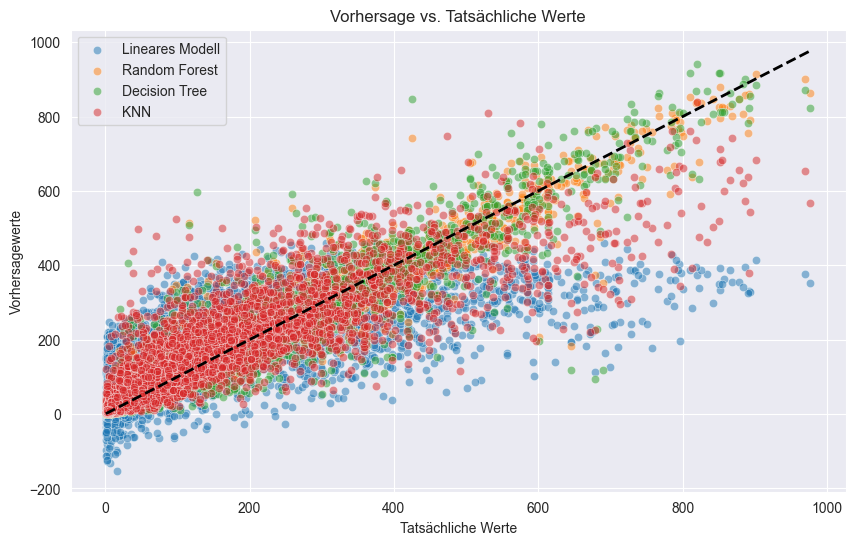

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lineares, label="Lineares Modell", alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred_random_forest, label="Random Forest", alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred_decision_tree, label="Decision Tree", alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred_knn, label="KNN", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Vorhersage vs. Tatsächliche Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhersagewerte")
plt.legend()
plt.show()

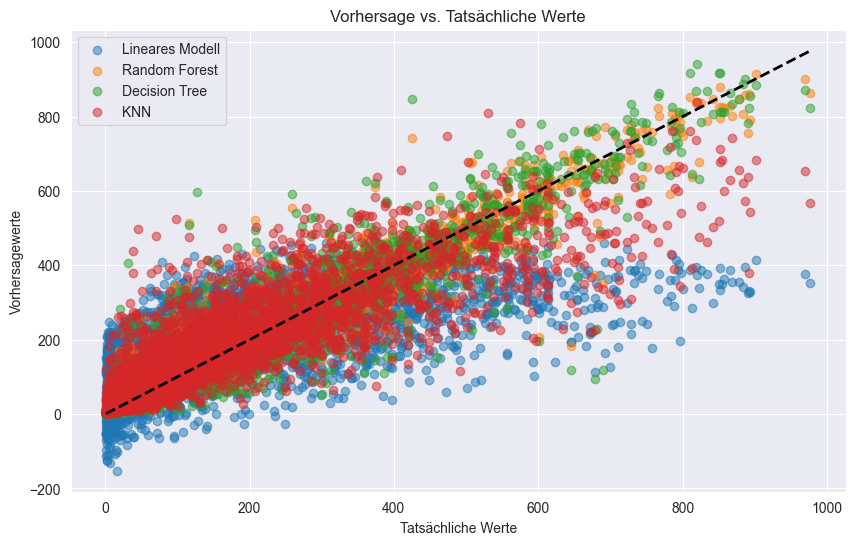

In [16]:
# alternativ nur mit matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred_lineares, label="Lineares Modell", alpha=0.5)
plt.scatter(x=y_test, y=y_pred_random_forest, label="Random Forest", alpha=0.5)
plt.scatter(x=y_test, y=y_pred_decision_tree, label="Decision Tree", alpha=0.5)
plt.scatter(x=y_test, y=y_pred_knn, label="KNN", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Vorhersage vs. Tatsächliche Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhersagewerte")
plt.legend()
plt.show()

# Zusammenfassend
In diesem Notebook haben wir insgesamt 4 Modell auf den bike_sharing Datensatz angewendet.
Wir nutzen 2 Möglichkeiten die Qualität der Modelle zu bewerten.
Insgesamt können wir die Modelle wie folgt (nach ihrer Qualität) sortieren: RandomForest > DecisionTree > KNN > LinearRegression.


# Abgabe 2
Using shap-IQ to calculate Shapley-value and shapley interaction second order.

In [17]:
n_features = X_train.shape[1]
feature_names = data.drop(['count'], axis=1).columns

In [18]:
explainer_tabular = shapiq.TabularExplainer(model=random_forest_model, data=X_train, index="SII", max_order=2)
instance_id = 1000
x_explain = X_test[instance_id]
y_true = y_test[instance_id]
y_pred = lineares_model.predict(x_explain.reshape(1, -1))[0]

print(f"Instance {instance_id}, True Value: {y_true}, Predicted Value: {y_pred}")
for i, feature in enumerate(feature_names):
    print(f"{feature}: {x_explain[i]}")

Instance 1000, True Value: 3, Predicted Value: 75.23537505962304
year: 2011
month: 6
hour: 5
holiday: 0
weekday: 1
workingday: 1
temp: 25.42
feel_temp: 28.79
humidity: 0.83
windspeed: 8.9981
season_spring: False
season_summer: True
season_winter: False
weather_heavy_rain: False
weather_misty: False
weather_rain: True


In [19]:
interaction_values = explainer_tabular.explain(x_explain, budget=2**n_features, random_state=0)
interaction_values

InteractionValues(
    index=SII, max_order=2, min_order=0, estimated=False, estimation_budget=65536,
    n_players=16, baseline_value=191.12138477307056
)

In [20]:
data.dtypes

year                    int64
month                   int64
hour                    int64
holiday                 int64
weekday                 int64
workingday              int64
temp                  float64
feel_temp             float64
humidity              float64
windspeed             float64
count                   int64
season_spring            bool
season_summer            bool
season_winter            bool
weather_heavy_rain       bool
weather_misty            bool
weather_rain             bool
dtype: object

In [21]:
print(x_explain)

[2011 6 5 0 1 1 25.42 28.79 0.83 8.9981 False True False False False True]


In [22]:
interaction_values.dict_values

{(): 0.0,
 (0,): -20.308516233334768,
 (1,): 2.9860267774634766,
 (2,): -141.93592080124182,
 (3,): 0.4738066115446227,
 (4,): -1.3846545782048252,
 (5,): -3.0890120240554118,
 (6,): 9.682532208845222,
 (7,): 3.7761083920050993,
 (8,): -11.217718998606474,
 (9,): 1.1682180967791445,
 (10,): 1.6474787865128835,
 (11,): 0.8902923813914175,
 (12,): -0.5080948438280011,
 (13,): 0.43910631597151517,
 (14,): 0.707830938640946,
 (15,): -13.008868071394042,
 (0, 1): 2.5358347123659146,
 (0, 2): 23.42359270007986,
 (0, 3): -0.4683982501076091,
 (0, 4): 1.887052720067982,
 (0, 5): 0.7072485007512977,
 (0, 6): -1.204591853465374,
 (0, 7): 0.18557769801896332,
 (0, 8): 4.124273457519623,
 (0, 9): -0.14661669424573823,
 (0, 10): -1.3236528279822657,
 (0, 11): 0.5461355467465958,
 (0, 12): -0.6590089953205897,
 (0, 13): -0.46839968426753836,
 (0, 14): -0.525825785863257,
 (0, 15): 5.800263763106333,
 (1, 2): -2.0377741904435567,
 (1, 3): -0.46806494514415065,
 (1, 4): -0.5856717801241946,
 (1, 5): 0

In [23]:
interaction_values.get_n_order(2).dict_values

{(0, 1): 2.5358347123659146,
 (0, 2): 23.42359270007986,
 (0, 3): -0.4683982501076091,
 (0, 4): 1.887052720067982,
 (0, 5): 0.7072485007512977,
 (0, 6): -1.204591853465374,
 (0, 7): 0.18557769801896332,
 (0, 8): 4.124273457519623,
 (0, 9): -0.14661669424573823,
 (0, 10): -1.3236528279822657,
 (0, 11): 0.5461355467465958,
 (0, 12): -0.6590089953205897,
 (0, 13): -0.46839968426753836,
 (0, 14): -0.525825785863257,
 (0, 15): 5.800263763106333,
 (1, 2): -2.0377741904435567,
 (1, 3): -0.46806494514415065,
 (1, 4): -0.5856717801241946,
 (1, 5): 0.2833226522754505,
 (1, 6): 0.056084883575311766,
 (1, 7): -0.3080222561336678,
 (1, 8): -1.4181988548937714,
 (1, 9): -0.6415503191965796,
 (1, 10): 0.07898809424331814,
 (1, 11): -0.32203271340053,
 (1, 12): -0.5879128517153176,
 (1, 13): -0.46839768631236445,
 (1, 14): -0.4739057763834709,
 (1, 15): -1.8331056537934385,
 (2, 3): -0.5219064885205307,
 (2, 4): 2.2099045814695026,
 (2, 5): 12.095834019591651,
 (2, 6): -15.599998567792815,
 (2, 7): -4

In [24]:
interaction_values.get_n_order_values(2)

array([[  0.        ,   2.53583471,  23.4235927 ,  -0.46839825,
          1.88705272,   0.7072485 ,  -1.20459185,   0.1855777 ,
          4.12427346,  -0.14661669,  -1.32365283,   0.54613555,
         -0.659009  ,  -0.46839968,  -0.52582579,   5.80026376],
       [  2.53583471,   0.        ,  -2.03777419,  -0.46806495,
         -0.58567178,   0.28332265,   0.05608488,  -0.30802226,
         -1.41819885,  -0.64155032,   0.07898809,  -0.32203271,
         -0.58791285,  -0.46839769,  -0.47390578,  -1.83310565],
       [ 23.4235927 ,  -2.03777419,   0.        ,  -0.52190649,
          2.20990458,  12.09583402, -15.59999857,  -4.69962918,
         19.1573618 ,  -1.31827935,  -1.1808432 ,  -1.93896383,
          0.89934777,  -0.46841262,  -0.36030323,  20.23715482],
       [ -0.46839825,  -0.46806495,  -0.52190649,   0.        ,
         -0.46840745,  -0.50169005,  -0.47764182,  -0.48300254,
         -0.4779095 ,  -0.4689144 ,  -0.46913616,  -0.46842033,
         -0.46839755,  -0.46840386,  

### Visualization

(<Figure size 600x600 with 1 Axes>, <Axes: >)

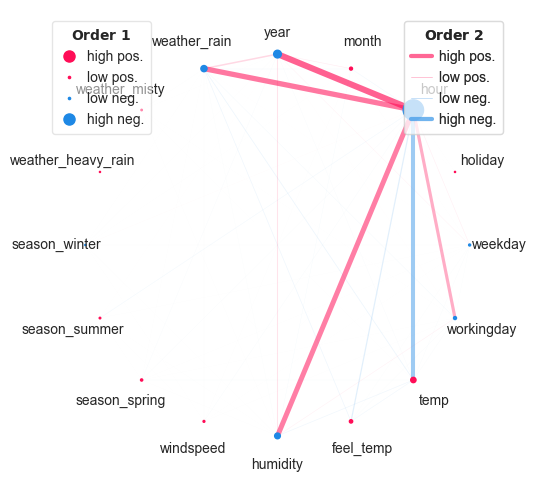

In [25]:
shapiq.network_plot(
    first_order_values=interaction_values.get_n_order_values(1),
    second_order_values=interaction_values.get_n_order_values(2),
    feature_names = feature_names
)

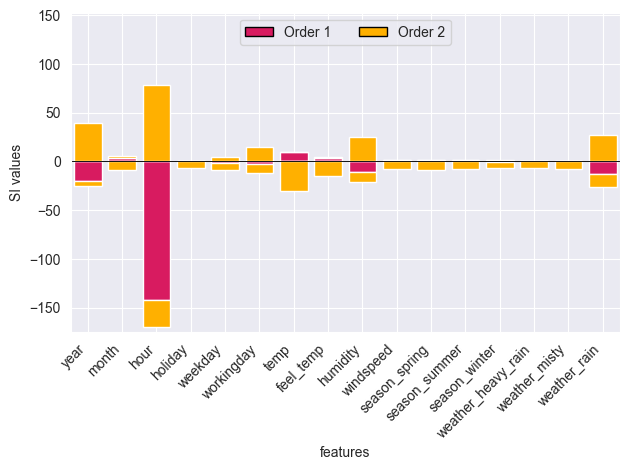

In [26]:
_ = shapiq.stacked_bar_plot(
    interaction_values = interaction_values,
    feature_names=feature_names
)

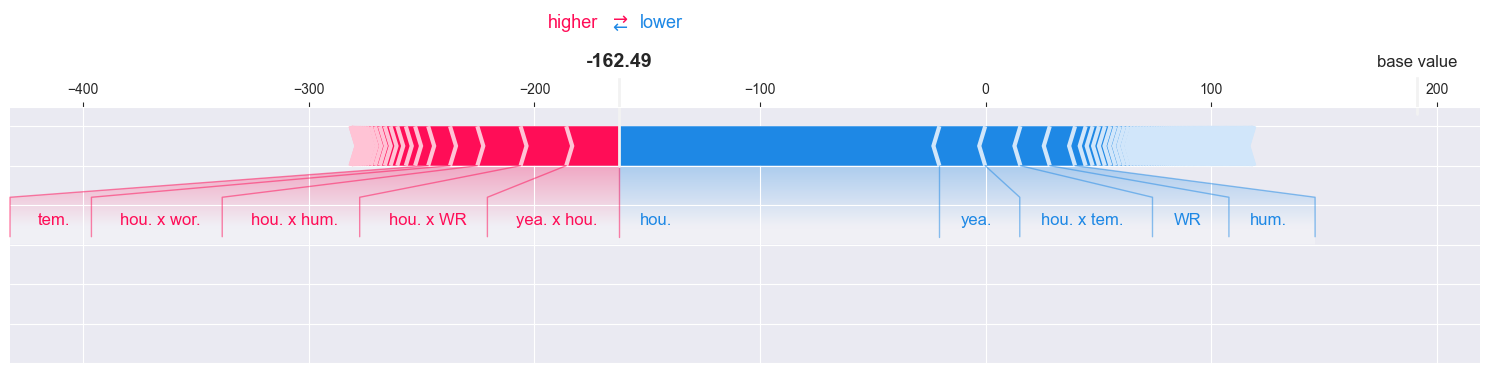

In [27]:
interaction_values.plot_force(feature_names=feature_names)

### Interpretation
We can tell from the plot that the __hour__ feature plays the largest role in the prediction in our case. Same with some interaction that involved __hour__: (__hour__,__year__), (__hour__, __humidity__), (__hour__, __temperature__), (__hour__, __weather_rain__) etc., which are second-order interactions. (everything is pretty clear from the plot tbh, powerful library)